In [12]:
# import the needed packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [13]:
# cell to generate the synthetic data 

# set the departments/unitts as well as the parameters of low/high 
n_units = 10
business_units = [f"Unit {i+1}" for i in range(n_units)]
np.random.seed(42) # for reproducibility - helps with random generation of data/numbers 

# define the parameters for the low and high values of the accounts recievable in the synthetic data
aging_buckets = {
    'Current' : (50000, 50000000),
    '1-30 Days' : (10000, 2000000),
    '31-60 Days' : (5000, 3000000),
    '61-90 Days' : (1000, 7000000),
    '91-120 Days' : (500, 50000000),
    '121-365 Days' : (1000, 4000000),
    'Over 365 Days' : (1000, 3000000),
    'Unapplied Payments' : (-1000, -5000),
    '# of Invoices' : (100, 15000)
}

# generate the data from the parameters we chose
data = {'Business Unit' : business_units}
for bucket, (low, high) in aging_buckets.items():
    if bucket == '# of Invoices':
        data[bucket] = np.random.randint(low, high, n_units)
    else:
        data[bucket] = np.round(np.random.uniform(low, high, n_units),2)

df = pd.DataFrame(data)
df['Total Due'] = df[['Current', '1-30 Days', '31-60 Days', '61-90 Days',
                      '91-120 Days', '121-365 Days', 'Over 365 Days']].sum(axis=1)
df['Net Amount Due'] = df['Total Due'] + df['Unapplied Payments']

# show the dataframe
df.head()

,Business Unit,Current,1-30 Days,31-60 Days,61-90 Days,91-120 Days,121-365 Days,Over 365 Days,Unapplied Payments,# of Invoices,Total Due,Net Amount Due
0,Unit 1,18758278.94,50963.14,1837499.42,4253206.42,6102350.72,3878368.93,1166643.19,-4088.98,6378,36047310.76,36043221.78
1,Unit 2,47538179.61,1940120.61,422784.11,1194498.34,24759097.92,3100756.16,814775.75,-1794.86,8492,79770212.50,79768417.64
2,Unit 3,36613097.39,1666560.86,879973.22,456296.10,1719908.86,3758056.27,2486383.79,-1022.09,14251,47580276.49,47579254.40
3,Unit 4,29952991.29,432554.83,1102253.72,6642249.88,45466065.44,3579414.57,1070903.23,-4261.85,13167,88246432.96,88242171.11
4,Unit 5,7843131.09,371831.68,1370929.60,6759458.60,12939369.69,2392002.02,843522.59,-3827.43,3204,32520245.27,32516417.84


In [14]:
# calculate the present value of the receivables to show money being lost
discount_rate = 0.10 # 10% discount rate 

# map the buckets to the months
aging_buckets = {
    'Current' : 0,
    '1-30 Days' : 1,
    '31-60 Days' : 2,
    '61-90 Days' : 3,
    '91-120 Days' : 4,
    '121-365 Days' : 8,
    'Over 365 Days' : 18
}

# calculate the present value of each bucket
for bucket, months in aging_buckets.items():
    df[f'{bucket} PV'] = df[bucket] / ((1 + discount_rate) ** months)

#calculate the total present value
df['Total PV'] = df[[f'{bucket} PV' for bucket in aging_buckets]].sum(axis=1)

# show the results of the present value 
df[['Business Unit', 'Total Due', 'Total PV']] 

,Business Unit,Total Due,Total PV
0,Unit 1,36047310.76,2.970581e+07
1,Unit 2,79770212.50,6.905265e+07
2,Unit 3,47580276.49,4.257331e+07
3,Unit 4,88246432.96,6.916397e+07
4,Unit 5,32520245.27,2.449801e+07
5,Unit 6,54674879.88,3.902097e+07
6,Unit 7,22667144.46,1.649881e+07
7,Unit 8,75794668.29,6.462505e+07
8,Unit 9,65256675.93,5.473136e+07
9,Unit 10,52739317.80,4.584163e+07


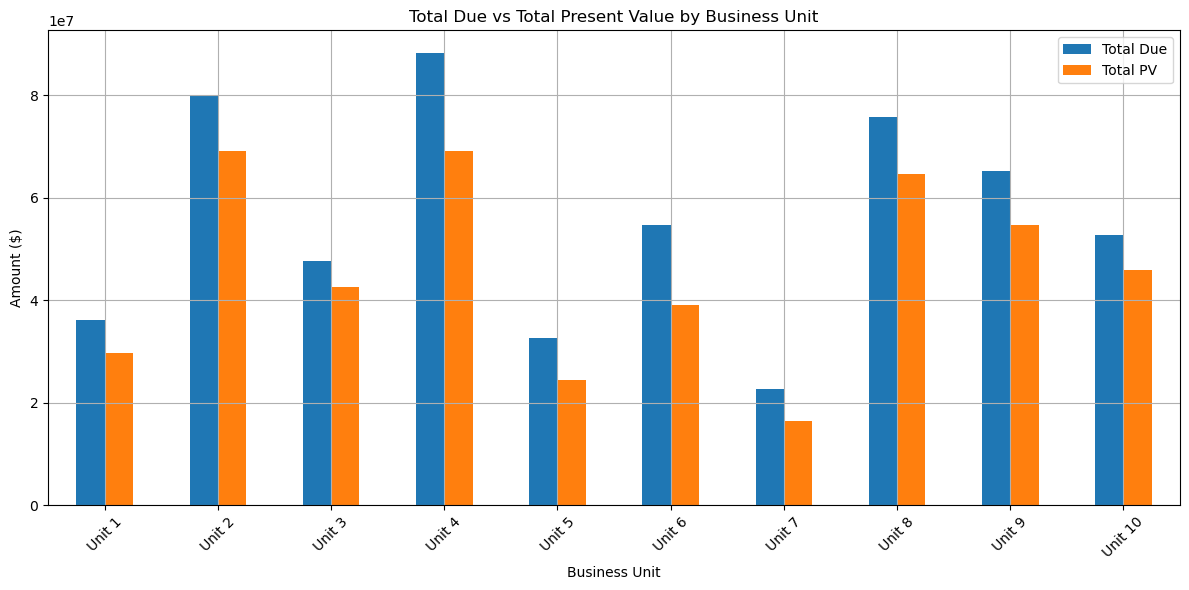

In [15]:
# lets plot the results 
df.plot(x = 'Business Unit', y = ['Total Due', 'Total PV'], kind = 'bar', figsize=(12, 6), title= 'Total Due vs Total Present Value by Business Unit')
plt.ylabel('Amount ($)')
plt.xlabel('Business Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()